## CS441: Applied ML - HW 2

### Part 1: Model Complexity and Tree-based Regressors

Include all the code for Part 1 in this section

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS441/hw1/" 
  T = np.load(datadir + 'temperature_data.npz')
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target temperature
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()

# load data
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

Mounted at /content/drive


In [ ]:
# to plot the errors
def plot_depth_error(max_depths, tree_train_err, tree_val_err, rf_train_err, rf_val_err, bt_train_err, bt_val_err):
  plt.figure(figsize=(15,15))
  plt.semilogx(max_depths, tree_train_err, 'r.--',label='tree train')
  plt.semilogx(max_depths, tree_val_err, 'r.-', label='tree val')
  plt.semilogx(max_depths, rf_train_err, 'g.--',label='RF train')
  plt.semilogx(max_depths, rf_val_err, 'g.-', label='RF val')
  plt.semilogx(max_depths, bt_train_err, 'b.--',label='BT train')
  plt.semilogx(max_depths, bt_val_err, 'b.-', label='BT val')
  plt.ylabel('RMSE Error')
  plt.xlabel('Max Tree Depth')
  plt.xticks(max_depths, max_depths)
  plt.legend()
  plt.rcParams.update({'font.size': 20})
  plt.show()

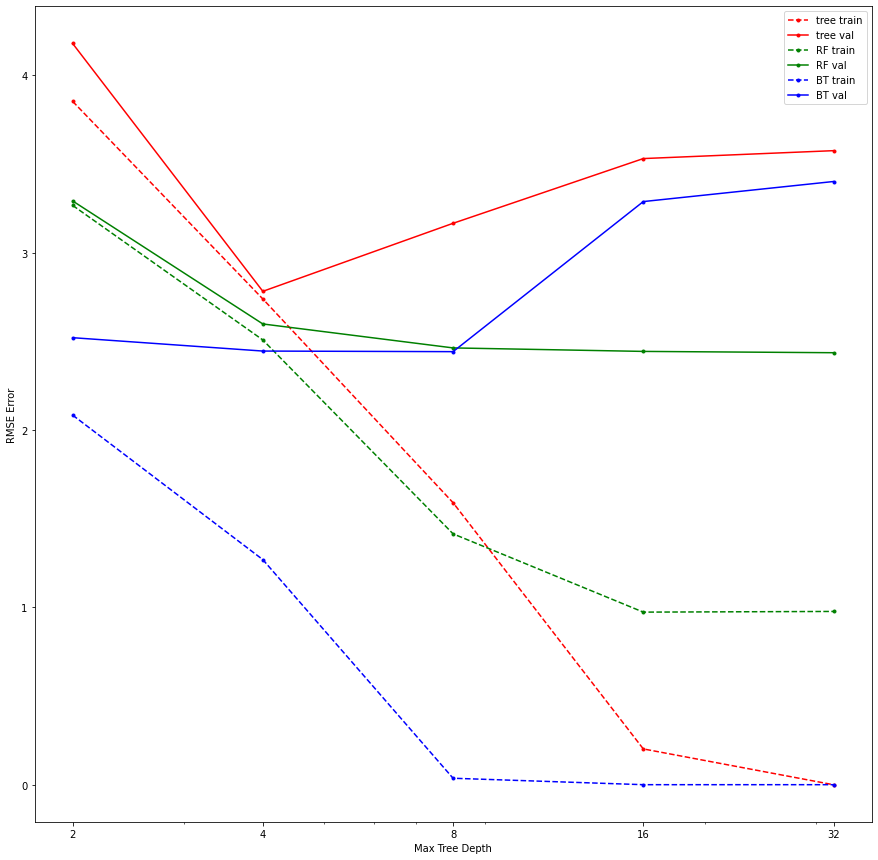

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

max_depths = [2,4,8,16,32]

# usage examples
#model = DecisionTreeRegressor(random_state=0, max_depth=max_depths)
#model = RandomForestRegressor(random_state=0, max_depth=max_depths, max_features=1/3)
# model = GradientBoostingRegressor(random_state=0, max_depth=max_depth)
#plot_depth_error(max_depths, tree_train_err, tree_val_err, rf_train_err, rf_val_err, bt_train_err, bt_val_err)


def plot_gradient(max_depths, x, y, valx, valy):
  train_errors = []
  val_errors = []
  for d in max_depths:
    model = GradientBoostingRegressor(random_state=0, max_depth= d) 
    model.fit(x,y)
    y_train_pred = model.predict(x)
    rmse_train = np.sqrt(mean_squared_error(y, y_train_pred))
    train_errors.append(rmse_train)
    y_val_pred = model.predict(valx)
    rmse_val = np.sqrt(mean_squared_error(valy, y_val_pred))
    val_errors.append(rmse_val)
  return (train_errors, val_errors)

def plot_tree(max_depths, x, y, valx, valy):
  train_errors = []
  val_errors = []
  for d in max_depths:
    model = DecisionTreeRegressor(random_state=0, max_depth= d)
    model.fit(x,y)
    y_train_pred = model.predict(x)
    rmse_train = np.sqrt(mean_squared_error(y, y_train_pred))
    train_errors.append(rmse_train)
    y_val_pred = model.predict(valx)
    rmse_val = np.sqrt(mean_squared_error(valy, y_val_pred))
    val_errors.append(rmse_val)
  return (train_errors, val_errors)

def plot_forest(max_depths, x, y, valx, valy):
  train_errors = []
  val_errors = []
  for d in max_depths:
    model = RandomForestRegressor(random_state=0, max_depth= d, max_features = 1/3)
    model.fit(x,y)
    y_train_pred = model.predict(x)
    rmse_train = np.sqrt(mean_squared_error(y, y_train_pred))
    train_errors.append(rmse_train)
    y_val_pred = model.predict(valx)
    rmse_val = np.sqrt(mean_squared_error(valy, y_val_pred))
    val_errors.append(rmse_val)
  return (train_errors, val_errors)



t_train, t_val = plot_tree(max_depths, x_train, y_train, x_val, y_val)
f_train, f_val = plot_forest(max_depths, x_train, y_train, x_val, y_val)
g_train, g_val = plot_gradient(max_depths, x_train, y_train, x_val, y_val)
plot_depth_error(max_depths, t_train, t_val, f_train, f_val, g_train, g_val)

In [ ]:
#plot_rf(x_train, y_train, x_val, y_val, max_depths)
'''
def plot_tree(x_train, y_train, x_val, y_val, max_depths):
    train_err = []
    val_err = []
    for max_depth in max_depths:
        model = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
        model.fit(x_train, y_train)
        train_err.append(mean_squared_error(y_train, model.predict(x_train), squared=False))
        val_err.append(mean_squared_error(y_val, model.predict(x_val), squared=False))
    plot_depth_error(max_depths, train_err, val_err, [], [], [], [])

def plot_rf(x_train, y_train, x_val, y_val, max_depths):
    train_err = []
    val_err = []
    for max_depth in max_depths:
        model = RandomForestRegressor(random_state=0, max_depth=max_depth, max_features=1/3)
        model.fit(x_train, y_train)
        train_err.append(mean_squared_error(y_train, model.predict(x_train), squared=False))
        val_err.append(mean_squared_error(y_val, model.predict(x_val), squared=False))
    plot_depth_error(max_depths, [], [], train_err, val_err, [], [])

def plot_gbm(x_train, y_train, x_val, y_val, max_depths):
    train_err = []
    val_err = []
    for max_depth in max_depths:
        model = GradientBoostingRegressor(random_state=0, max_depth=max_depth)
        model.fit(x_train, y_train)
        train_err.append(mean_squared_error(y_train, model.predict(x_train), squared=False))
        val_err.append(mean_squared_error(y_val, model.predict(x_val), squared=False))
    plot_depth_error(max_depths, [], [], [], [], train_err, val_err)
'''

'\ndef plot_tree(x_train, y_train, x_val, y_val, max_depths):\n    train_err = []\n    val_err = []\n    for max_depth in max_depths:\n        model = DecisionTreeRegressor(random_state=0, max_depth=max_depth)\n        model.fit(x_train, y_train)\n        train_err.append(mean_squared_error(y_train, model.predict(x_train), squared=False))\n        val_err.append(mean_squared_error(y_val, model.predict(x_val), squared=False))\n    plot_depth_error(max_depths, train_err, val_err, [], [], [], [])\n\ndef plot_rf(x_train, y_train, x_val, y_val, max_depths):\n    train_err = []\n    val_err = []\n    for max_depth in max_depths:\n        model = RandomForestRegressor(random_state=0, max_depth=max_depth, max_features=1/3)\n        model.fit(x_train, y_train)\n        train_err.append(mean_squared_error(y_train, model.predict(x_train), squared=False))\n        val_err.append(mean_squared_error(y_val, model.predict(x_val), squared=False))\n    plot_depth_error(max_depths, [], [], train_err, val

### Part 2: MLPs with MNIST

Include all the code for Part 2 in this section

In [1]:
# initialization code
import numpy as np
from keras.datasets import mnist 
%matplotlib inline
from matplotlib import pyplot as plt 
from scipy import stats
import torch
import torch.nn as nn
# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1 
# splits into train/val/test sets and provides indices for subsets of train 
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data() 
  x_train = np.reshape(x_train, (len(x_train), 28*28)) 
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval 
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices
  # displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15)) 
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
    plt.imshow(np.reshape(x, (28,28)), cmap='gray')
    plt.axis('off')
  plt.show()
    # counts the number of examples per class 
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32') 
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Sets device to "cuda" if a GPU is available  (in Colabs, enable GPU by Edit->Notebook Settings-->Hardware Accelerator=GPU)
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [5]:
def display_error_curves(num_epochs, training_losses, validation_losses): 
  """
Plots the training and validation loss curves 
"""
  plt.plot(range(num_epochs), training_losses, label="Training Loss") 
  plt.plot(range(num_epochs), validation_losses, label="Validation Loss")
  # Add in a title and axes labels plt.title('Training and Validation Loss') 
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  # Display the plot 
  plt.legend(loc='best') 
  plt.show()

In [6]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size): 
    super(MLP, self).__init__()
    # Needs code here
    self.layers = nn.Sequential(
      nn.Linear(input_size, hidden_size), 
      nn.ReLU(),
      nn.Linear(hidden_size, output_size)
    )
  def forward(self, x):
    # Needs code here
    return self.layers(x)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Function definition for training MLP
def train_MLP_mnist(train_loader, val_loader, lr=0.1, num_epochs=100):
  '''
  Train a MLP 
  Input: train_loader - data loader for training data
         val_loader - data loader for validation data
         lr - learning rate (default: 0.1)
         num_epochs - number of epochs to train the model (default: 100)
  Output: trained MLP model
  '''
  # Define the input, hidden and output sizes for the MLP
  input_size = 28 * 28
  hidden_size = 64
  output_size = 10

  # Instantiate the model
  mlp = MLP(input_size, hidden_size, output_size)

  # Set optimizer and loss function
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(mlp.parameters(), lr=lr)

  # Initialize lists to store training and validation metrics
  train_error, val_loss, val_error, train_loss = [], [], [], []
  
  # Train the model
  for epoch in range(num_epochs):
    current_train_loss = 0
    actuation = 0
    train_count = 0
    for i, data in enumerate(train_loader):
      inputs, targets = data 
      optimizer.zero_grad()
      outputs = mlp(inputs)
      loss = loss_function(outputs, targets) 
      loss.backward()
      optimizer.step()

      # Compute the training loss and accuracy for the current batch
      current_train_loss += loss.item()
      tp = outputs.argmax(dim=1, keepdim=True)
      actuation += tp.eq(targets.view_as(tp)).sum().item() 
      train_count += targets.shape[0]

    # Compute the average training loss and accuracy for the epoch
    current_train_loss /= len(train_loader) 
    train_loss.append(current_train_loss)
    current_train_error = 100 * (1 - actuation / train_count) 
    train_error.append(current_train_error)

    current_val_loss = 0 
    correct = 0
    total = 0
    with torch.no_grad():
      # Evaluate the model on the validation data
      for input, target in val_loader:
        output = mlp(input)
        current_val_loss += loss_function(output, target).item() 
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item() 
        total += target.shape[0]
    # Compute the average validation loss and accuracy for the epoch
    current_val_loss /= len(val_loader) 
    val_loss.append(current_val_loss) 
    current_val_error = 100 * (1 - correct / total) 
    val_error.append(current_val_error)

    if epoch in [24, 49, 99]: # Print metrics for selected epochs
      print(f'Epoch {epoch+1}, '
            f'training loss: {current_train_loss:.4f}, ' 
            f'validation loss: {current_val_loss:.4f}, ' 
            f'training error: {current_train_error:.2f}%, ' 
            f'validation error: {current_val_error:.2f}%')
    
    # Display Loss Curves
  display_error_curves(num_epochs, train_loss, val_loss)
  return mlp


cpu
Epoch 25, training loss: 0.1077, validation loss: 0.1333, training error: 3.02%, validation error: 3.76%
Epoch 50, training loss: 0.0587, validation loss: 0.0966, training error: 1.55%, validation error: 2.81%
Epoch 100, training loss: 0.0257, validation loss: 0.0893, training error: 0.51%, validation error: 2.65%


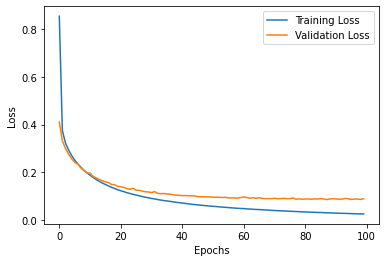

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(device) 
torch.manual_seed(0) 
x_train_tensor = torch.from_numpy(x_train).float() 
y_train_tensor = torch.from_numpy(y_train).long() 
x_val_tensor = torch.from_numpy(x_val).float() 
y_val_tensor = torch.from_numpy(y_val).long()

train_set = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor) 
val_set = torch.utils.data.TensorDataset(x_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True) 
val_loader = torch.utils.data.DataLoader(val_set, batch_size=256, shuffle=False)
train_MLP_mnist(train_loader, val_loader, lr=0.1, num_epochs=100)

Epoch 25, training loss: 0.0458, validation loss: 0.1990, training error: 1.44%, validation error: 5.25%
Epoch 50, training loss: 0.0141, validation loss: 0.1828, training error: 0.38%, validation error: 3.71%
Epoch 100, training loss: 0.0276, validation loss: 0.2011, training error: 0.87%, validation error: 4.00%


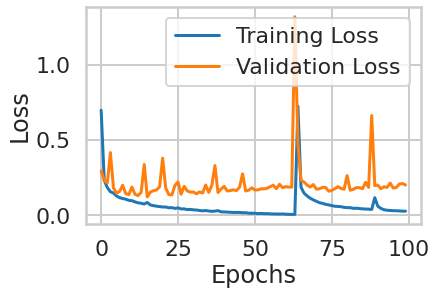

Epoch 25, training loss: 0.0146, validation loss: 0.1000, training error: 0.29%, validation error: 2.76%
Epoch 50, training loss: 0.0027, validation loss: 0.1071, training error: 0.01%, validation error: 2.46%
Epoch 100, training loss: 0.0008, validation loss: 0.1210, training error: 0.00%, validation error: 2.45%


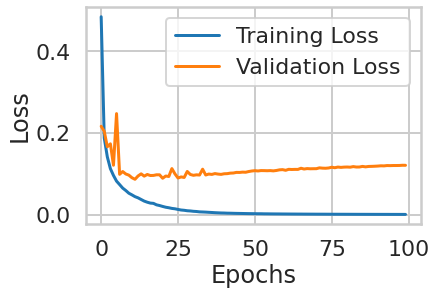

Epoch 25, training loss: 0.0208, validation loss: 0.0865, training error: 0.48%, validation error: 2.57%
Epoch 50, training loss: 0.0047, validation loss: 0.0936, training error: 0.01%, validation error: 2.51%
Epoch 100, training loss: 0.0014, validation loss: 0.1066, training error: 0.00%, validation error: 2.48%


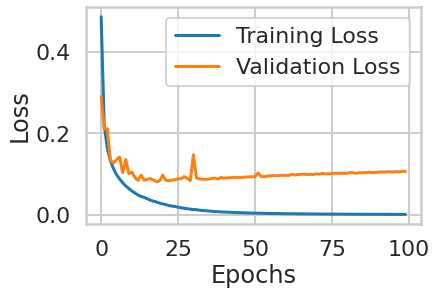

Epoch 25, training loss: 0.0296, validation loss: 0.0851, training error: 0.74%, validation error: 2.50%
Epoch 50, training loss: 0.0080, validation loss: 0.0929, training error: 0.06%, validation error: 2.42%
Epoch 100, training loss: 0.0021, validation loss: 0.1042, training error: 0.00%, validation error: 2.35%


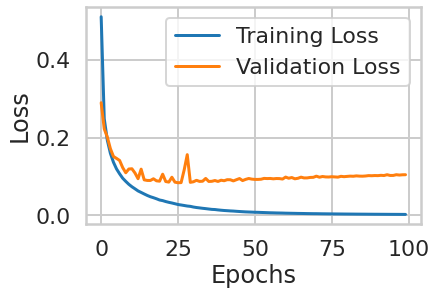

Epoch 25, training loss: 0.0399, validation loss: 0.0890, training error: 1.03%, validation error: 2.56%
Epoch 50, training loss: 0.0136, validation loss: 0.0879, training error: 0.19%, validation error: 2.38%
Epoch 100, training loss: 0.0034, validation loss: 0.0977, training error: 0.00%, validation error: 2.34%


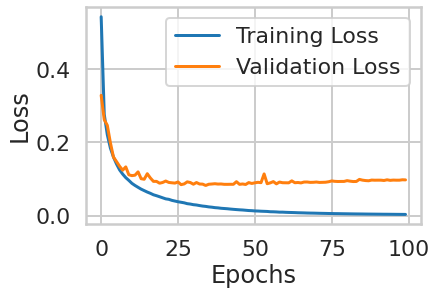

Epoch 25, training loss: 0.0476, validation loss: 0.1021, training error: 1.26%, validation error: 2.91%
Epoch 50, training loss: 0.0183, validation loss: 0.0928, training error: 0.31%, validation error: 2.60%
Epoch 100, training loss: 0.0048, validation loss: 0.1019, training error: 0.01%, validation error: 2.58%


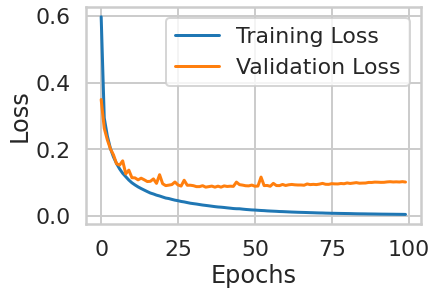

Epoch 25, training loss: 0.3239, validation loss: 0.3151, training error: 9.13%, validation error: 8.91%
Epoch 50, training loss: 0.2652, validation loss: 0.2632, training error: 7.52%, validation error: 7.55%
Epoch 100, training loss: 0.1951, validation loss: 0.2024, training error: 5.39%, validation error: 5.51%


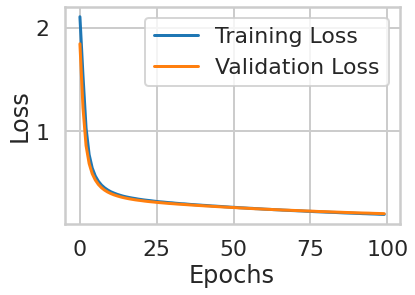

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [17]:
train_MLP_mnist(train_loader, val_loader, lr=1, num_epochs=100) #lr 1
train_MLP_mnist(train_loader, val_loader, lr=0.75, num_epochs=100)
train_MLP_mnist(train_loader, val_loader, lr=0.5, num_epochs=100) #lr 0.5 
train_MLP_mnist(train_loader, val_loader, lr=0.4, num_epochs=100) #lr 0.4
train_MLP_mnist(train_loader, val_loader, lr=0.3, num_epochs=100) #lr 0.3 
train_MLP_mnist(train_loader, val_loader, lr=0.25, num_epochs=100) #lr 0.3 
train_MLP_mnist(train_loader, val_loader, lr=0.01, num_epochs=100) #lr 0.01 


In [ ]:
# experiments code
#print(train_loader) # make sure you're using GPU instance
#print(val_loader)
#torch.manual_seed(0) # to avoid randomness, but if you wanted to create an ensemble, you should not use a manual seed
x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).long()
test_set = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor) 
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False) 
train_MLP_mnist(train_loader, test_loader, lr=0.4, num_epochs=100) #lr 0.4

## Part 3: Predicting Penguin Species

Include all your code for part 3 in this section.  

In [13]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
#styling preferences for sns
sns.set_style('whitegrid')
sns.set_context('poster')
drive.mount('/content/gdrive/')
datadir = "/content/gdrive/MyDrive/CS441/hw2/" 
df_penguins = pd.read_csv(datadir + 'penguins_size.csv')
df_penguins.head(10)

def get_penguin_xy(df_penguins):
  data = np.array(df_penguins[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])
  y = df_penguins['species']
  ui = np.unique(data[:,0])
  us = np.unique(data[:,-1])
  X = np.zeros((len(y), 10))
  for i in range(len(y)):
    f = 0
    for j in range(len(ui)):
      if data[i, f]==ui[j]:
        X[i, f+j] = 1
    X[i, 3:7] = data[i, 1:5]
    for j in range(len(us)):
      if data[i, 5]==us[j]:
        X[i, f+j] = 1
  feature_names = ['island_biscoe', 'island_dream', 'island_torgersen', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_female', 'sex_male', 'sex_unknown']
  X = pd.DataFrame(X, columns=feature_names)
  return(X, y, feature_names, np.unique(y))


Mounted at /content/gdrive/


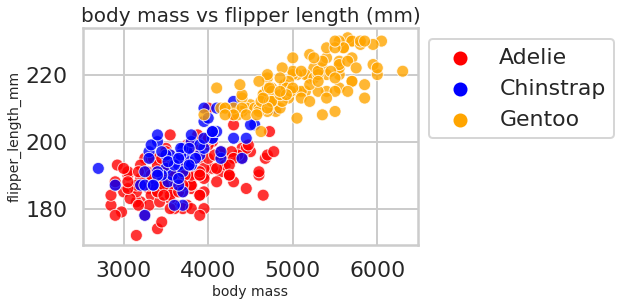

In [14]:
palette = ["red", "blue", "orange"]

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_penguins, x = 'body_mass_g', y = 'flipper_length_mm', 
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('body mass', fontsize=14)
plt.ylabel('flipper_length_mm', fontsize=14)
plt.title('body mass vs flipper length (mm)', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# create other visualizations


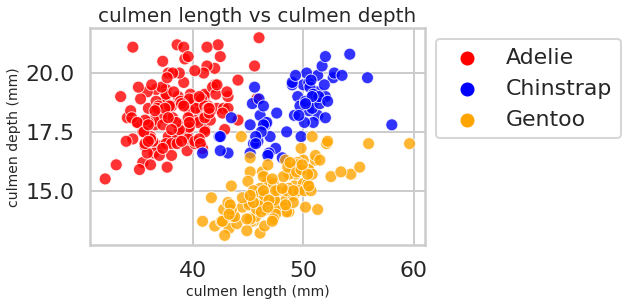

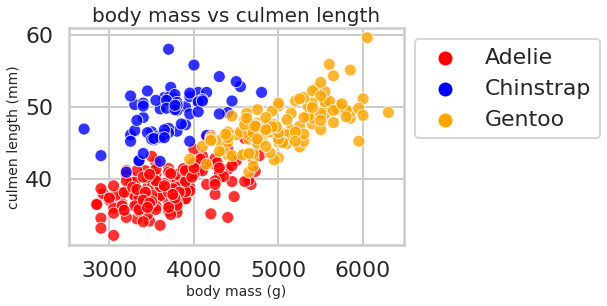

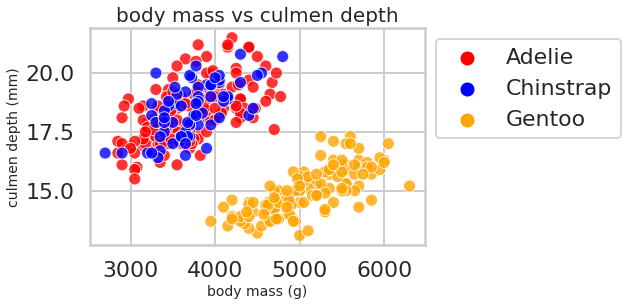

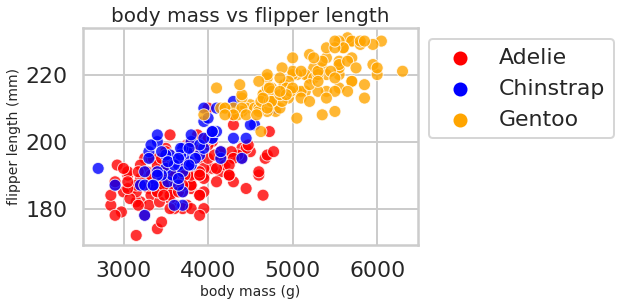

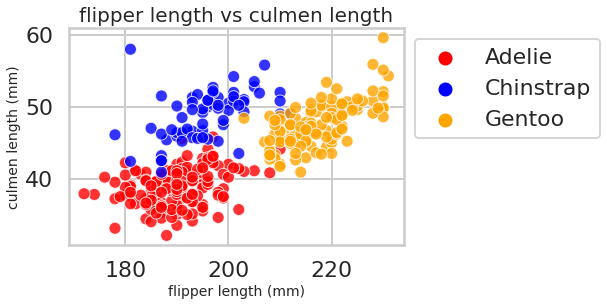

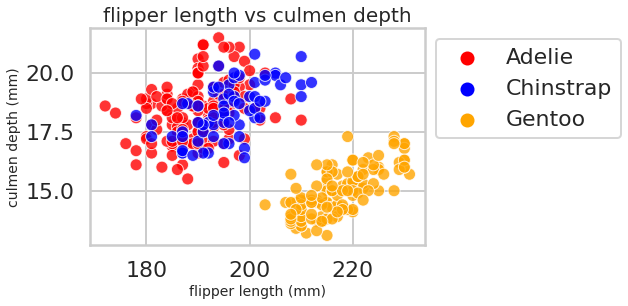

In [15]:
# Scatterplot of culmen_length_mm vs culmen_depth_mm
sns.scatterplot(data=df_penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('culmen length (mm)', fontsize=14)
plt.ylabel('culmen depth (mm)', fontsize=14)
plt.title('culmen length vs culmen depth', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Scatterplot of body_mass_g vs culmen_length_mm
sns.scatterplot(data=df_penguins, x='body_mass_g', y='culmen_length_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('body mass (g)', fontsize=14)
plt.ylabel('culmen length (mm)', fontsize=14)
plt.title('body mass vs culmen length', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Scatterplot of body_mass_g vs culmen_depth_mm
sns.scatterplot(data=df_penguins, x='body_mass_g', y='culmen_depth_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('body mass (g)', fontsize=14)
plt.ylabel('culmen depth (mm)', fontsize=14)
plt.title('body mass vs culmen depth', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Scatterplot of body_mass_g vs flipper_length_mm
sns.scatterplot(data=df_penguins, x='body_mass_g', y='flipper_length_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('body mass (g)', fontsize=14)
plt.ylabel('flipper length (mm)', fontsize=14)
plt.title('body mass vs flipper length', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Scatterplot of flipper_length_mm vs culmen_length_mm
sns.scatterplot(data=df_penguins, x='flipper_length_mm', y='culmen_length_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('flipper length (mm)', fontsize=14)
plt.ylabel('culmen length (mm)', fontsize=14)
plt.title('flipper length vs culmen length', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Scatterplot of flipper_length_mm vs culmen_depth_mm
sns.scatterplot(data=df_penguins, x='flipper_length_mm', y='culmen_depth_mm', hue='species', palette=palette, alpha=0.8)
plt.xlabel('flipper length (mm)', fontsize=14)
plt.ylabel('culmen depth (mm)', fontsize=14)
plt.title('flipper length vs culmen depth', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

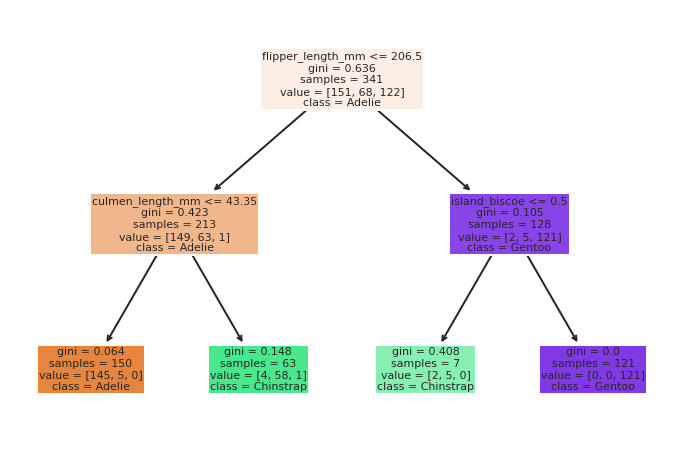

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Get the features and labels
X, y, feature_names, class_names = get_penguin_xy(df_penguins)

# Create the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

# Fit the model on the data
clf.fit(X, y)

# Display the decision tree with labeled features and classes
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

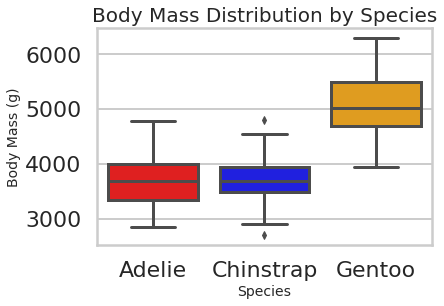

In [ ]:
sns.boxplot(data=df_penguins, x='species', y='body_mass_g', palette=palette)

plt.xlabel('Species', fontsize=14)
plt.ylabel('Body Mass (g)', fontsize=14)
plt.title('Body Mass Distribution by Species', fontsize=20)
plt.show()

In [ ]:
# design a classification model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X, y, feature_names, class_names = get_penguin_xy(df_penguins)

model = RandomForestClassifier()

scores = cross_val_score(model, np.array(X), np.array(y), cv=5)
print('CV Accuracy: {}'.format(scores.mean()))


CV Accuracy: 0.9911764705882353


## Part 4: Stretch Goals
Include any new code needed for Part 3 here

cpu


TypeError: ignored